<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br>
<b>DM-45853: Investigate increase in unassociated DIASources after Replace LoadDiaCatalogs with a PipelineTask</b> <br>
Contact author: Eric Bellm<br>
Last verified to run: August 26, 2024<br>
LSST Science Piplines version: w_2024_32<br>
Container Size: Medium<br>

## Analysis Summary

* 

## Table of Contents

1. [Imports, Helper Functions, and Loading](#section_1)

## 1. <a id="section_1">Imports, Helper Functions, and Loading</a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import lsst.daf.butler as dafButler
import functools
import operator

from lsst.analysis.ap.nb_utils import compare_sources
import lsst.analysis.ap.apdb as apdb

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.set_loglevel('WARNING')

In [30]:
base_dir = '/sdf/group/rubin/user/ebellm/workspace/tickets/DM-45853/cosmos_d_2024_08_13/'
repo = base_dir+'/repo'
collections = 'ap_verify-output'
instrument = 'HSC'
skymap = 'hsc_rings_v1'

butler_13 = dafButler.Butler(repo, collections=collections)

dbType='sqlite'
dbName = base_dir+"association.db"

apdb_query_13 = apdb.ApdbSqliteQuery(dbName, instrument='HSC')
cutout_path_13 = base_dir+'/cutouts/'

In [31]:
base_dir = '/sdf/group/rubin/user/ebellm/workspace/tickets/DM-45853/cosmos_d_2024_08_15/'
repo = base_dir+'/repo'
collections = 'ap_verify-output'
instrument = 'HSC'
skymap = 'hsc_rings_v1'

butler_15 = dafButler.Butler(repo, collections=collections)

dbType='sqlite'
dbName = base_dir+"association.db"

apdb_query_15 = apdb.ApdbSqliteQuery(dbName, instrument='HSC')
cutout_path_15 = base_dir+'/cutouts/'

In [34]:
df_only_13, df_only_15, df_matched = compare_sources(butler_13, butler_15, apdb_query_13, apdb_query_15, match_radius=1, 
                                                     cutout_path1=cutout_path_13, cutout_path2=cutout_path_15,
                                                     make_cutouts=True, display_cutouts=True)

139 matched sources; 0 unique to set 1; 7 unique to set 2.


Unique to dataset 2: 25397870345584738


FileNotFoundError: [Errno 2] No such file or directory: '/sdf/group/rubin/user/ebellm/workspace/tickets/DM-45853/cosmos_d_2024_08_15//cutouts/images/25397870345584738.png'

In [26]:
df_only_13

,diaSourceId,visit,detector,diaObjectId,ssObjectId,parentDiaSourceId,ssObjectReassocTime,midpointMjdTai,ra,raErr,...,pixelFlags_streak,pixelFlags_streakCenter,pixelFlags_injected,pixelFlags_injectedCenter,pixelFlags_injected_template,pixelFlags_injected_templateCenter,pixelId,instrument,xmatch_dist_arcsec,src2_diaSourceId


In [27]:
df_only_15

,diaSourceId,visit,detector,diaObjectId,ssObjectId,parentDiaSourceId,ssObjectReassocTime,midpointMjdTai,ra,raErr,...,pixelFlags_suspect,pixelFlags_suspectCenter,pixelFlags_streak,pixelFlags_streakCenter,pixelFlags_injected,pixelFlags_injectedCenter,pixelFlags_injected_template,pixelFlags_injected_templateCenter,pixelId,instrument
91,25397870345584738,59134,5,25397870345584738,0,0,None,57454.289074,149.749938,NaN,...,False,False,False,False,False,False,False,False,15560586125031,HSC
92,25397870345584739,59134,5,25397870345584739,0,0,None,57454.289074,149.749938,NaN,...,False,False,False,False,False,False,False,False,15560586125031,HSC
94,25397870345584741,59134,5,25397870345584741,0,0,None,57454.289074,149.749938,NaN,...,False,False,False,False,False,False,False,False,15560586125031,HSC
96,25397870345584745,59134,5,25397870345584745,0,0,None,57454.289074,149.754771,NaN,...,False,False,False,False,False,False,False,False,15560586131151,HSC
105,25397870345584756,59134,5,25397870345584756,0,0,None,57454.289074,149.774723,NaN,...,False,False,False,False,False,False,False,False,15560586491095,HSC
106,25397870345584757,59134,5,25397870345584757,0,0,None,57454.289074,149.754771,NaN,...,False,False,False,False,False,False,False,False,15560586131151,HSC
110,25397870345584764,59134,5,25397870345584764,0,0,None,57454.289074,149.719781,NaN,...,False,False,False,False,False,False,False,False,15560584991949,HSC


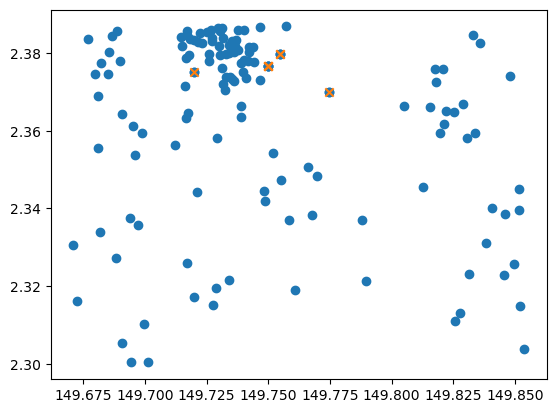

In [35]:
plt.figure()
plt.scatter(df_matched.ra, df_matched.dec)
plt.scatter(df_only_15.ra, df_only_15.dec, marker='x')